In [33]:
# 경고(warning) 비표시
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

# 제3장 고객의 전체모습을 파악하는 테크닉 10

### 테크닉21 : 데이터를 읽어들이고 확인하자

In [34]:
use_log = pd.read_csv('use_log.csv')
print(len(use_log))
use_log.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [35]:
customer_master = pd.read_csv('customer_master.csv')
print(len(customer_master))
customer_master.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [36]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [37]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 테크닉22 : 고객 데이터를 가공하자

In [38]:
user_type = pd.merge(customer_master, class_master, how='left', on='class')
print(len(user_type))
user_type = pd.merge(user_type, campaign_master, how='left', on='campaign_id')
user_type.groupby('class_name').count()['customer_id']

4192


class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [39]:
user_type.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [40]:
user_type.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### 테크닉23 : 고객 데이터를 집계하자

In [41]:
user_type.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [42]:
user_type.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [43]:
user_type.groupby(['is_deleted', 'campaign_name']).count()['customer_id']

is_deleted  campaign_name
0           0_입회비반액할인         282
            1_입회비무료           219
            2_일반             2341
1           0_입회비반액할인         368
            1_입회비무료           273
            2_일반              709
Name: customer_id, dtype: int64

In [44]:
user_type['start_date'] = pd.to_datetime(user_type['start_date'])
user_start = user_type.loc[user_type['start_date'] > pd.to_datetime('20180401')]
print(len(user_type))
print(len(user_start))

4192
1361


### 테크닉24 : 최근 고객데이터를 집계해보자

In [45]:
user_type['end_date'] = pd.to_datetime(user_type['end_date'])
user_newer = user_type.loc[(user_type['end_date'] >= pd.to_datetime("20190331")) | (user_type['end_date'].isna())]
user_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


In [46]:
user_newer.groupby('class_name').count()['customer_id']

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

### 테크닉25 : 이용이력 데이터를 집계하자

In [47]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
use_log['연월'] = use_log['usedate'].dt.strftime('%Y%m')
use_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   log_id       197428 non-null  object        
 1   customer_id  197428 non-null  object        
 2   usedate      197428 non-null  datetime64[ns]
 3   연월           197428 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.0+ MB


In [53]:
uselogMonth = use_log.groupby(['연월','customer_id'], as_index=False).count()
uselogMonth.rename(columns={'log_id':'count'}, inplace=True)

# 특정 컬럼 삭제
del uselogMonth['usedate']
uselogMonth

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [54]:
uselogMonth = uselogMonth.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']

In [55]:
uselogMonth

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [59]:
user_type = pd.merge(user_type, uselogMonth, how='left', on='customer_id')
print(len(user_type['customer_id']))

4192


### 테크닉26 : 이용이력 데이터로부터 정기이용 여부  플래그를 작성하자

In [60]:
use_log['weekday'] = use_log['usedate'].dt.weekday

In [62]:
use_log_weekly = use_log.groupby(['customer_id','연월','weekday'], as_index=False).count()[['customer_id','연월','weekday','log_id']]
use_log_weekly.head()

,customer_id,연월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [63]:
use_log_weekly.rename(columns={'log_id':'count'}, inplace=True)
use_log_weekly.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [64]:
use_log_weekly = use_log_weekly.groupby('customer_id', as_index=False).max()[['customer_id','count']]
use_log_weekly['routine_flag'] = 0
use_log_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   4192 non-null   object
 1   count         4192 non-null   int64 
 2   routine_flag  4192 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 98.4+ KB


In [65]:
use_log_weekly['routine_flag'] = use_log_weekly['routine_flag'].where(use_log_weekly['count']<4, 1)
use_log_weekly.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [66]:
user_type = pd.merge(user_type, use_log_weekly, how='left', on='customer_id')
user_type.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.833333,5.0,8,2,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,5.083333,5.0,7,3,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.583333,5.0,6,3,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.833333,4.5,7,2,4.833333,4.5,7,2,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,...,3.916667,4.0,6,1,3.916667,4.0,6,1,5,1


In [67]:
user_type

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.833333,5.0,8,2,4.833333,5.0,8,2,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,5.083333,5.0,7,3,5.083333,5.0,7,3,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.583333,5.0,6,3,4.583333,5.0,6,3,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.833333,4.5,7,2,4.833333,4.5,7,2,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,...,3.916667,4.0,6,1,3.916667,4.0,6,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,...,8.000000,8.0,8,8,8.000000,8.0,8,8,3,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,...,10.000000,10.0,10,10,10.000000,10.0,10,10,3,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,...,8.000000,8.0,8,8,8.000000,8.0,8,8,2,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,...,11.000000,11.0,11,11,11.000000,11.0,11,11,3,0


### 테크닉27 : 고객 데이터와 이용이력데이터를 결합하자

In [22]:
customer_join = pd.merge(use_log, user_type, how='left', on='customer_id')
customer_join.head(20)

,log_id,customer_id,usedate,연월,weekday,name,class,gender,start_date,end_date,...,is_deleted,class_name,price,campaign_name,mean,median,max,min,count,routine_flag
0,L00000049012330,AS009373,2018-04-01,201804,6,XX,C01,F,2015-11-01,NaT,...,0,0_종일,10500,2_일반,5.083333,5.0,7,3,5,1
1,L00000049012331,AS015315,2018-04-01,201804,6,XXXXX,C01,M,2015-07-01,NaT,...,0,0_종일,10500,2_일반,4.833333,5.0,7,3,5,1
2,L00000049012332,AS040841,2018-04-01,201804,6,XXXXX,C01,F,2017-05-01,NaT,...,0,0_종일,10500,2_일반,6.000000,6.0,10,4,5,1
3,L00000049012333,AS046594,2018-04-01,201804,6,XXX,C01,M,2018-03-01,NaT,...,0,0_종일,10500,2_일반,7.166667,7.0,10,5,5,1
4,L00000049012334,AS073285,2018-04-01,201804,6,XXXX,C01,M,2016-09-01,NaT,...,0,0_종일,10500,2_일반,4.916667,4.5,8,2,5,1
5,L00000049012335,AS077151,2018-04-01,201804,6,XXX,C02,F,2016-01-01,NaT,...,0,1_주간,7500,2_일반,5.166667,5.0,9,3,5,1
6,L00000049012336,AS161071,2018-04-01,201804,6,XXXXX,C01,M,2018-02-01,NaT,...,0,0_종일,10500,2_일반,6.833333,8.0,9,2,5,1
7,L00000049012337,AS170379,2018-04-01,201804,6,XXXX,C01,M,2017-03-01,NaT,...,0,0_종일,10500,2_일반,6.083333,6.0,9,1,5,1
8,L00000049012338,AS186727,2018-04-01,201804,6,XXXXX,C03,M,2017-03-01,NaT,...,0,2_야간,6000,2_일반,5.083333,5.0,8,3,5,1
9,L00000049012339,AS193568,2018-04-01,201804,6,XXXXX,C01,F,2018-02-01,NaT,...,0,0_종일,10500,2_일반,6.583333,7.0,10,3,5,1


### 테크닉28 : 회원기간을 계산하자

In [71]:
from dateutil.relativedelta import relativedelta

In [68]:
user_type['calc_date'] = user_type['end_date']
user_type

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,5.0,8,2,4.833333,5.0,8,2,4,1,NaT
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,5.0,7,3,5.083333,5.0,7,3,5,1,NaT
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,5.0,6,3,4.583333,5.0,6,3,5,1,NaT
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,4.5,7,2,4.833333,4.5,7,2,5,1,NaT
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,...,4.0,6,1,3.916667,4.0,6,1,5,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,...,8.0,8,8,8.000000,8.0,8,8,3,0,NaT
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,...,10.0,10,10,10.000000,10.0,10,10,3,0,NaT
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,...,8.0,8,8,8.000000,8.0,8,8,2,0,NaT
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,...,11.0,11,11,11.000000,11.0,11,11,3,0,NaT


In [69]:
user_type['calc_date'] = user_type['calc_date'].fillna(pd.to_datetime('20190430'))
user_type['membership_period'] = 0

user_type

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,8,2,4.833333,5.0,8,2,4,1,2019-04-30,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,7,3,5.083333,5.0,7,3,5,1,2019-04-30,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,6,3,4.583333,5.0,6,3,5,1,2019-04-30,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,7,2,4.833333,4.5,7,2,5,1,2019-04-30,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,...,6,1,3.916667,4.0,6,1,5,1,2019-04-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,...,8,8,8.000000,8.0,8,8,3,0,2019-04-30,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,...,10,10,10.000000,10.0,10,10,3,0,2019-04-30,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,...,8,8,8.000000,8.0,8,8,2,0,2019-04-30,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,...,11,11,11.000000,11.0,11,11,3,0,2019-04-30,0


In [73]:
for i in range(len(user_type)):
    delta =  relativedelta(user_type['calc_date'].iloc[i],user_type['start_date'].iloc[i])
    user_type["membership_period"].iloc[i] = delta.years*12 + delta.months
user_type.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,8,2,4.833333,5.0,8,2,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,7,3,5.083333,5.0,7,3,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,6,3,4.583333,5.0,6,3,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,7,2,4.833333,4.5,7,2,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,...,6,1,3.916667,4.0,6,1,5,1,2019-04-30,47


### 테크닉29 : 고객행동의 각종통계량을 파악하자

In [76]:
user_type[["mean_x", "median_x", "max_x", "min_x"]].describe()

,mean_x,median_x,max_x,min_x
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [77]:
user_type.groupby("routine_flag").count()['customer_id']

routine_flag
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

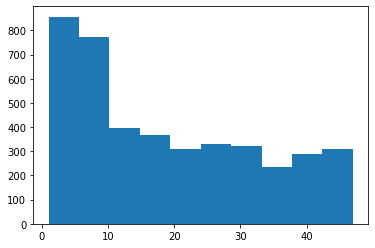

In [79]:
import matplotlib.pyplot as plt

plt.hist(user_type['membership_period'])

In [80]:
user_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        4192 non-null   object        
 1   name               4192 non-null   object        
 2   class              4192 non-null   object        
 3   gender             4192 non-null   object        
 4   start_date         4192 non-null   datetime64[ns]
 5   end_date           1350 non-null   datetime64[ns]
 6   campaign_id        4192 non-null   object        
 7   is_deleted         4192 non-null   int64         
 8   class_name         4192 non-null   object        
 9   price              4192 non-null   int64         
 10  campaign_name      4192 non-null   object        
 11  mean_x             4192 non-null   float64       
 12  median_x           4192 non-null   float64       
 13  max_x              4192 non-null   int64         
 14  min_x   

### 테크닉30 : 탈퇴회원과 지속회원의 차이를 파악하자

In [81]:
customer_end = user_type[user_type['is_deleted'] == 1]
customer_end.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,...,3,3,3.0,3.0,3,3,3,0,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,...,3,3,3.0,3.0,3,3,2,0,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,...,1,1,1.0,1.0,1,1,1,0,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,...,4,3,3.5,3.5,4,3,4,1,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,...,3,3,3.0,3.0,3,3,2,0,2018-05-31,23


In [82]:
customer_stay = user_type[user_type['is_deleted'] == 0]
customer_stay.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,8,2,4.833333,5.0,8,2,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,7,3,5.083333,5.0,7,3,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,...,6,3,4.583333,5.0,6,3,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,...,7,2,4.833333,4.5,7,2,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,...,6,1,3.916667,4.0,6,1,5,1,2019-04-30,47


In [83]:
customer_end.describe()

,is_deleted,price,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,3.865474,3.621852,6.461481,1.821481,3.215556,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,1.246385,1.270847,2.584021,0.976361,1.217087,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,4.000000,1.000000,2.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,4.000000,4.000000,7.000000,2.000000,3.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,4.666667,4.500000,8.000000,2.000000,4.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,9.000000,9.000000,13.000000,8.000000,5.000000,1.000000,23.000000


In [84]:
customer_stay.describe()

,is_deleted,price,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,count,routine_flag,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,6.030288,6.024279,8.471147,3.620690,4.865588,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,1.553587,1.599765,1.571048,2.030488,0.406154,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,3.166667,3.000000,5.000000,1.000000,2.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,4.833333,5.000000,7.000000,2.000000,5.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,5.583333,5.500000,8.000000,3.000000,5.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,7.178030,7.000000,10.000000,5.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,12.000000,12.000000,14.000000,12.000000,5.000000,1.000000,47.000000
